In [1]:
from typing import Annotated
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from dotenv import load_dotenv
from IPython.display import Image, display
import gradio as gr
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from pydantic import BaseModel
import random

e:\ML Projects\Autogen-AgentAI\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Some useful constants

nouns = ["Cabbages", "Unicorns", "Toasters", "Penguins", "Bananas", "Zombies", "Rainbows", "Eels", "Pickles", "Muffins"]
adjectives = ["outrageous", "smelly", "pedantic", "existential", "moody", "sparkly", "untrustworthy", "sarcastic", "squishy", "haunted"]

In [3]:
load_dotenv(override=True)

True

In [4]:
def shout(name):
    return name.upper()


print(shout("Udit"))

UDIT


In [5]:
def shout(name: str) -> str:
    return name.upper()


print(shout("Udit"))

UDIT


Annotated - gives some additional information along with the variable you pass


In [6]:
def shout(name : Annotated[str, "Something to be shouted"]) -> str:
    return name.upper()


print(shout("Udit"))

UDIT


In langGraph, we will substitute "Something to be shouted" with a Reducer. 

Reducer is a function that combines one state with another 

### Step 1: Define the State object 

In [7]:
class State(BaseModel):
    messages: Annotated[list, add_messages]

here add_messages is a reducer

### Step 2: Start the graph builder with this State Class

In [8]:
graph_builder = StateGraph(State)

### Step 3: Create a Node

A node can be any python function.

The reducer that we set before gets automatically called to combine this response with previous responses

In [9]:
def our_first_node(old_state: State) -> State:
    reply = f"{random.choice(nouns)} are {random.choice(adjectives)}"
    messages = [{"role": "assistant", "content" : reply}]
    new_state = State(messages = messages)
    return new_state

graph_builder.add_node("first_node", our_first_node)

### Step 4: Create Edges

In [10]:
graph_builder.add_edge(START, "first_node")
graph_builder.add_edge("first_node", END)

#### Step 5: Compile the graph

In [11]:
graph = graph_builder.compile()

In [12]:
display(Image(graph.get_graph().draw_mermaid_png()))

ConnectionError: HTTPSConnectionPool(host='mermaid.ink', port=443): Max retries exceeded with url: /img/JSV7aW5pdDogeydmbG93Y2hhcnQnOiB7J2N1cnZlJzogJ2xpbmVhcid9fX0lJQpncmFwaCBURDsKCV9fc3RhcnRfXyhbPHA+X19zdGFydF9fPC9wPl0pOjo6Zmlyc3QKCWZpcnN0X25vZGUoZmlyc3Rfbm9kZSkKCV9fZW5kX18oWzxwPl9fZW5kX188L3A+XSk6OjpsYXN0CglfX3N0YXJ0X18gLS0+IGZpcnN0X25vZGU7CglmaXJzdF9ub2RlIC0tPiBfX2VuZF9fOwoJY2xhc3NEZWYgZGVmYXVsdCBmaWxsOiNmMmYwZmYsbGluZS1oZWlnaHQ6MS4yCgljbGFzc0RlZiBmaXJzdCBmaWxsLW9wYWNpdHk6MAoJY2xhc3NEZWYgbGFzdCBmaWxsOiNiZmI2ZmMK?type=png&bgColor=!white (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001E5EAAE0C70>: Failed to resolve 'mermaid.ink' ([Errno 11001] getaddrinfo failed)"))

In [ ]:
def chat(user_input: str, history):
    message = {"role": "user", "content" : user_input}
    messages = [message]
    state = State(messages = messages)
    result = graph.invoke(state)
    print(result)
    return result["messages"][-1].content

gr.ChatInterface(chat, type = "messages").launch()

* Running on local URL:  http://127.0.0.1:7867

To create a public link, set `share=True` in `launch()`.


{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='a4930bf8-a940-4f4f-80bf-bfd5f2f58f03'), AIMessage(content='Toasters are sparkly', additional_kwargs={}, response_metadata={}, id='ef211249-bbaa-43b4-a78a-270f5699ae86')]}
{'messages': [HumanMessage(content='Really?', additional_kwargs={}, response_metadata={}, id='0704b258-642e-4b18-86da-c0b550b50b8c'), AIMessage(content='Penguins are smelly', additional_kwargs={}, response_metadata={}, id='725cb760-4f25-4d64-9284-56163406723a')]}


#### To make the point that LangGraph is all about python functions - it doesn't need to involve LLMs!!

In [ ]:
class State(BaseModel):
    messages : Annotated[list, add_messages]

In [ ]:
graph_builder = StateGraph(State)

In [ ]:
llm = ChatOpenAI(model = "gpt-4o-mini")

def chatbot_node(old_state: State) -> State:
    response = llm.invoke(old_state.messages)
    new_state = State(messages = [response])
    return new_state

graph_builder.add_node("chatbot", chatbot_node)

In [ ]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

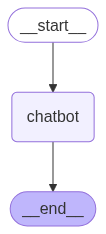

In [ ]:
graph = graph_builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
def chat(user_input: str, history):
    initial_state = State(messages = [{"role" : "user", "content" : user_input}])
    result = graph.invoke(initial_state)
    print(result)
    return result['messages'][-1].content

gr.ChatInterface(chat, type = "messages").launch()

* Running on local URL:  http://127.0.0.1:7868

To create a public link, set `share=True` in `launch()`.


{'messages': [HumanMessage(content='Capital of France?', additional_kwargs={}, response_metadata={}, id='9a8ec35a-f52b-4646-bee3-c766be2664bb'), AIMessage(content='The capital of France is Paris.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 7, 'prompt_tokens': 11, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': None, 'id': 'chatcmpl-BvOxPLVP03rql6CN2J3OcZ6TGJVzv', 'finish_reason': 'stop', 'logprobs': None}, id='run-036d51f4-da58-4cce-bbb1-68bc63553d49-0', usage_metadata={'input_tokens': 11, 'output_tokens': 7, 'total_tokens': 18, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}
{'messages': [HumanMessage(content='What is your name', additio